In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os
import numpy as np
from datetime import datetime, timedelta
import math
import json
from collections import Counter

In [70]:
stats = pd.read_json('stats/LoadTestSession1/User1/stats.json')


In [71]:
stats.head()

,webrtcStats,timestamp,user,session
0,"[{'event': 'getUserMedia', 'tag': 'getUserMedi...",2024-05-20 11:02:54.009000+00:00,User1,LoadTestSession1
1,"[{'event': 'onconnectionstatechange', 'tag': '...",2024-05-20 11:02:56.009000+00:00,User1,LoadTestSession1
2,"[{'event': 'stats', 'tag': 'stats', 'peerId': ...",2024-05-20 11:02:58.009000+00:00,User1,LoadTestSession1
3,"[{'statsSamples': {}}, {'statsSamples': {}}, {...",2024-05-20 11:03:00.011000+00:00,User1,LoadTestSession1
4,"[{'event': 'stats', 'tag': 'stats', 'peerId': ...",2024-05-20 11:03:02.012000+00:00,User1,LoadTestSession1


In [72]:
# each element in the webrtcStats column is a JSON array of JSONs
# for each JSON, there is a webrtcStats property that is a JSON array of JSONs
# for each JSON, there is an event property that is a string
# we want to count the number of times each event type occurs

def extract_events(row):
    events = []
    webrtc_stats_list = row['webrtcStats']
    for item in webrtc_stats_list:
        if 'event' in item:
            events.append(item['event'])
    return events

# Apply the function to each row and collect all events
all_events = []
for index, row in stats.iterrows():
    all_events.extend(extract_events(row))

# Count the occurrences of each event
event_counts = Counter(all_events)

# Convert the Counter to a DataFrame for better visualization
event_counts_df = pd.DataFrame(event_counts.items(), columns=['event', 'count'])

display(event_counts_df)

,event,count
0,getUserMedia,4
1,addConnection,8
2,onnegotiationneeded,1
3,onsignalingstatechange,2
4,onicegatheringstatechange,2
5,onicecandidate,44
6,oniceconnectionstatechange,6
7,onconnectionstatechange,6
8,stats,2396


In [73]:
stats_events = []
for index, row in stats.iterrows():
    webrtc_stats_list = row['webrtcStats']
    for item in webrtc_stats_list:
        if 'event' in item:
            if item['event'] == 'stats':
                stats_events.append(item)

df = pd.DataFrame(stats_events)
display(df.head())


,event,tag,peerId,connectionId,timeTaken,data,timestamp
0,stats,stats,User1,9dc1f1e4-47a5-4133-9606-1485e94afe64,2,"{'audio': {'inbound': [], 'outbound': []}, 'vi...",2024-05-20T11:02:54.456Z
1,stats,stats,User1,9dc1f1e4-47a5-4133-9606-1485e94afe64,1,"{'audio': {'inbound': [], 'outbound': []}, 'vi...",2024-05-20T11:02:55.454Z
2,stats,stats,User1,9dc1f1e4-47a5-4133-9606-1485e94afe64,1,"{'audio': {'inbound': [], 'outbound': [{'id': ...",2024-05-20T11:02:56.460Z
3,stats,stats,User3,str_CAM_Ilui_con_LNa0vP0RBr,1,"{'audio': {'inbound': [{'id': '31fd2c56', 'tim...",2024-05-20T11:02:56.460Z
4,stats,stats,User2,str_CAM_VaE1_con_KPGvgPTcxN,1,"{'audio': {'inbound': [{'id': '4c6b3d5c', 'tim...",2024-05-20T11:02:56.460Z


In [74]:
df["data"]
normalized_qos = pd.json_normalize(df["data"])
# add df["peerId"] to normalized_qos
normalized_qos["peerId"] = df["peerId"]
display(normalized_qos.head())

,audio.inbound,audio.outbound,video.inbound,video.outbound,connection.id,connection.timestamp,connection.type,connection.bytesReceived,connection.bytesSent,connection.lastPacketReceivedTimestamp,...,connection.remote.address,connection.remote.candidateType,connection.remote.port,connection.remote.priority,connection.remote.protocol,remote.audio.inbound,remote.audio.outbound,remote.video.inbound,remote.video.outbound,peerId
0,[],[],[],[],f939d7f,1716202974452,candidate-pair,1581,781,1716202974012,...,44.222.156.75,srflx,57660,1679819007,udp,[],[],[],[],User1
1,[],[],[],[],f939d7f,1716202975452,candidate-pair,1581,781,1716202974012,...,44.222.156.75,srflx,57660,1679819007,udp,[],[],[],[],User1
2,[],"[{'id': 'b143fef8', 'timestamp': 1716202976453...",[],"[{'id': 'b463852f', 'timestamp': 1716202976453...",f939d7f,1716202976452,candidate-pair,2017,46371,1716202976381,...,44.222.156.75,srflx,57660,1679819007,udp,"[{'id': 'ac4d141', 'timestamp': 1716202976026,...",[],"[{'id': '69da8138', 'timestamp': 1716202976380...",[],User1
3,"[{'id': '31fd2c56', 'timestamp': 1716202976454...",[],"[{'id': '6b70a3d0', 'timestamp': 1716202976454...",[],a6f6d96b,1716202976454,candidate-pair,57216,847,1716202976444,...,44.222.156.75,srflx,44220,1679819263,udp,[],"[{'id': 'dce510b9', 'timestamp': 1716202976298...",[],"[{'id': 'b2651e98', 'timestamp': 1716202976175...",User3
4,"[{'id': '4c6b3d5c', 'timestamp': 1716202976455...",[],"[{'id': 'b67b1972', 'timestamp': 1716202976455...",[],8b7b2dab,1716202976455,candidate-pair,44420,893,1716202976444,...,44.222.156.75,srflx,44866,1679819263,udp,[],"[{'id': '3c60e2a7', 'timestamp': 1716202976158...",[],"[{'id': 'd773639f', 'timestamp': 1716202976199...",User2


In [75]:
#remove all entries where audio.inbound is an empty list
def not_empty_list(x):
    return x != []
normalized_inbound = normalized_qos[normalized_qos["audio.inbound"].apply(not_empty_list)]

# keep only audio.inbound, video.inbound, remote.audio.outbound, remote.video.outbound and peerID
normalized_inbound = normalized_inbound[["audio.inbound", "video.inbound", "remote.audio.outbound", "remote.video.outbound", "peerId"]]

def expand_column(df, column_name):
    expanded = df[column_name].apply(pd.Series).stack().reset_index(level=1, drop=True)
    expanded = pd.json_normalize(expanded)
    return expanded

audio_inbound = expand_column(normalized_inbound, "audio.inbound")
video_inbound = expand_column(normalized_inbound, "video.inbound")
remote_audio_outbound = expand_column(normalized_inbound, "remote.audio.outbound")
remote_video_outbound = expand_column(normalized_inbound, "remote.video.outbound")

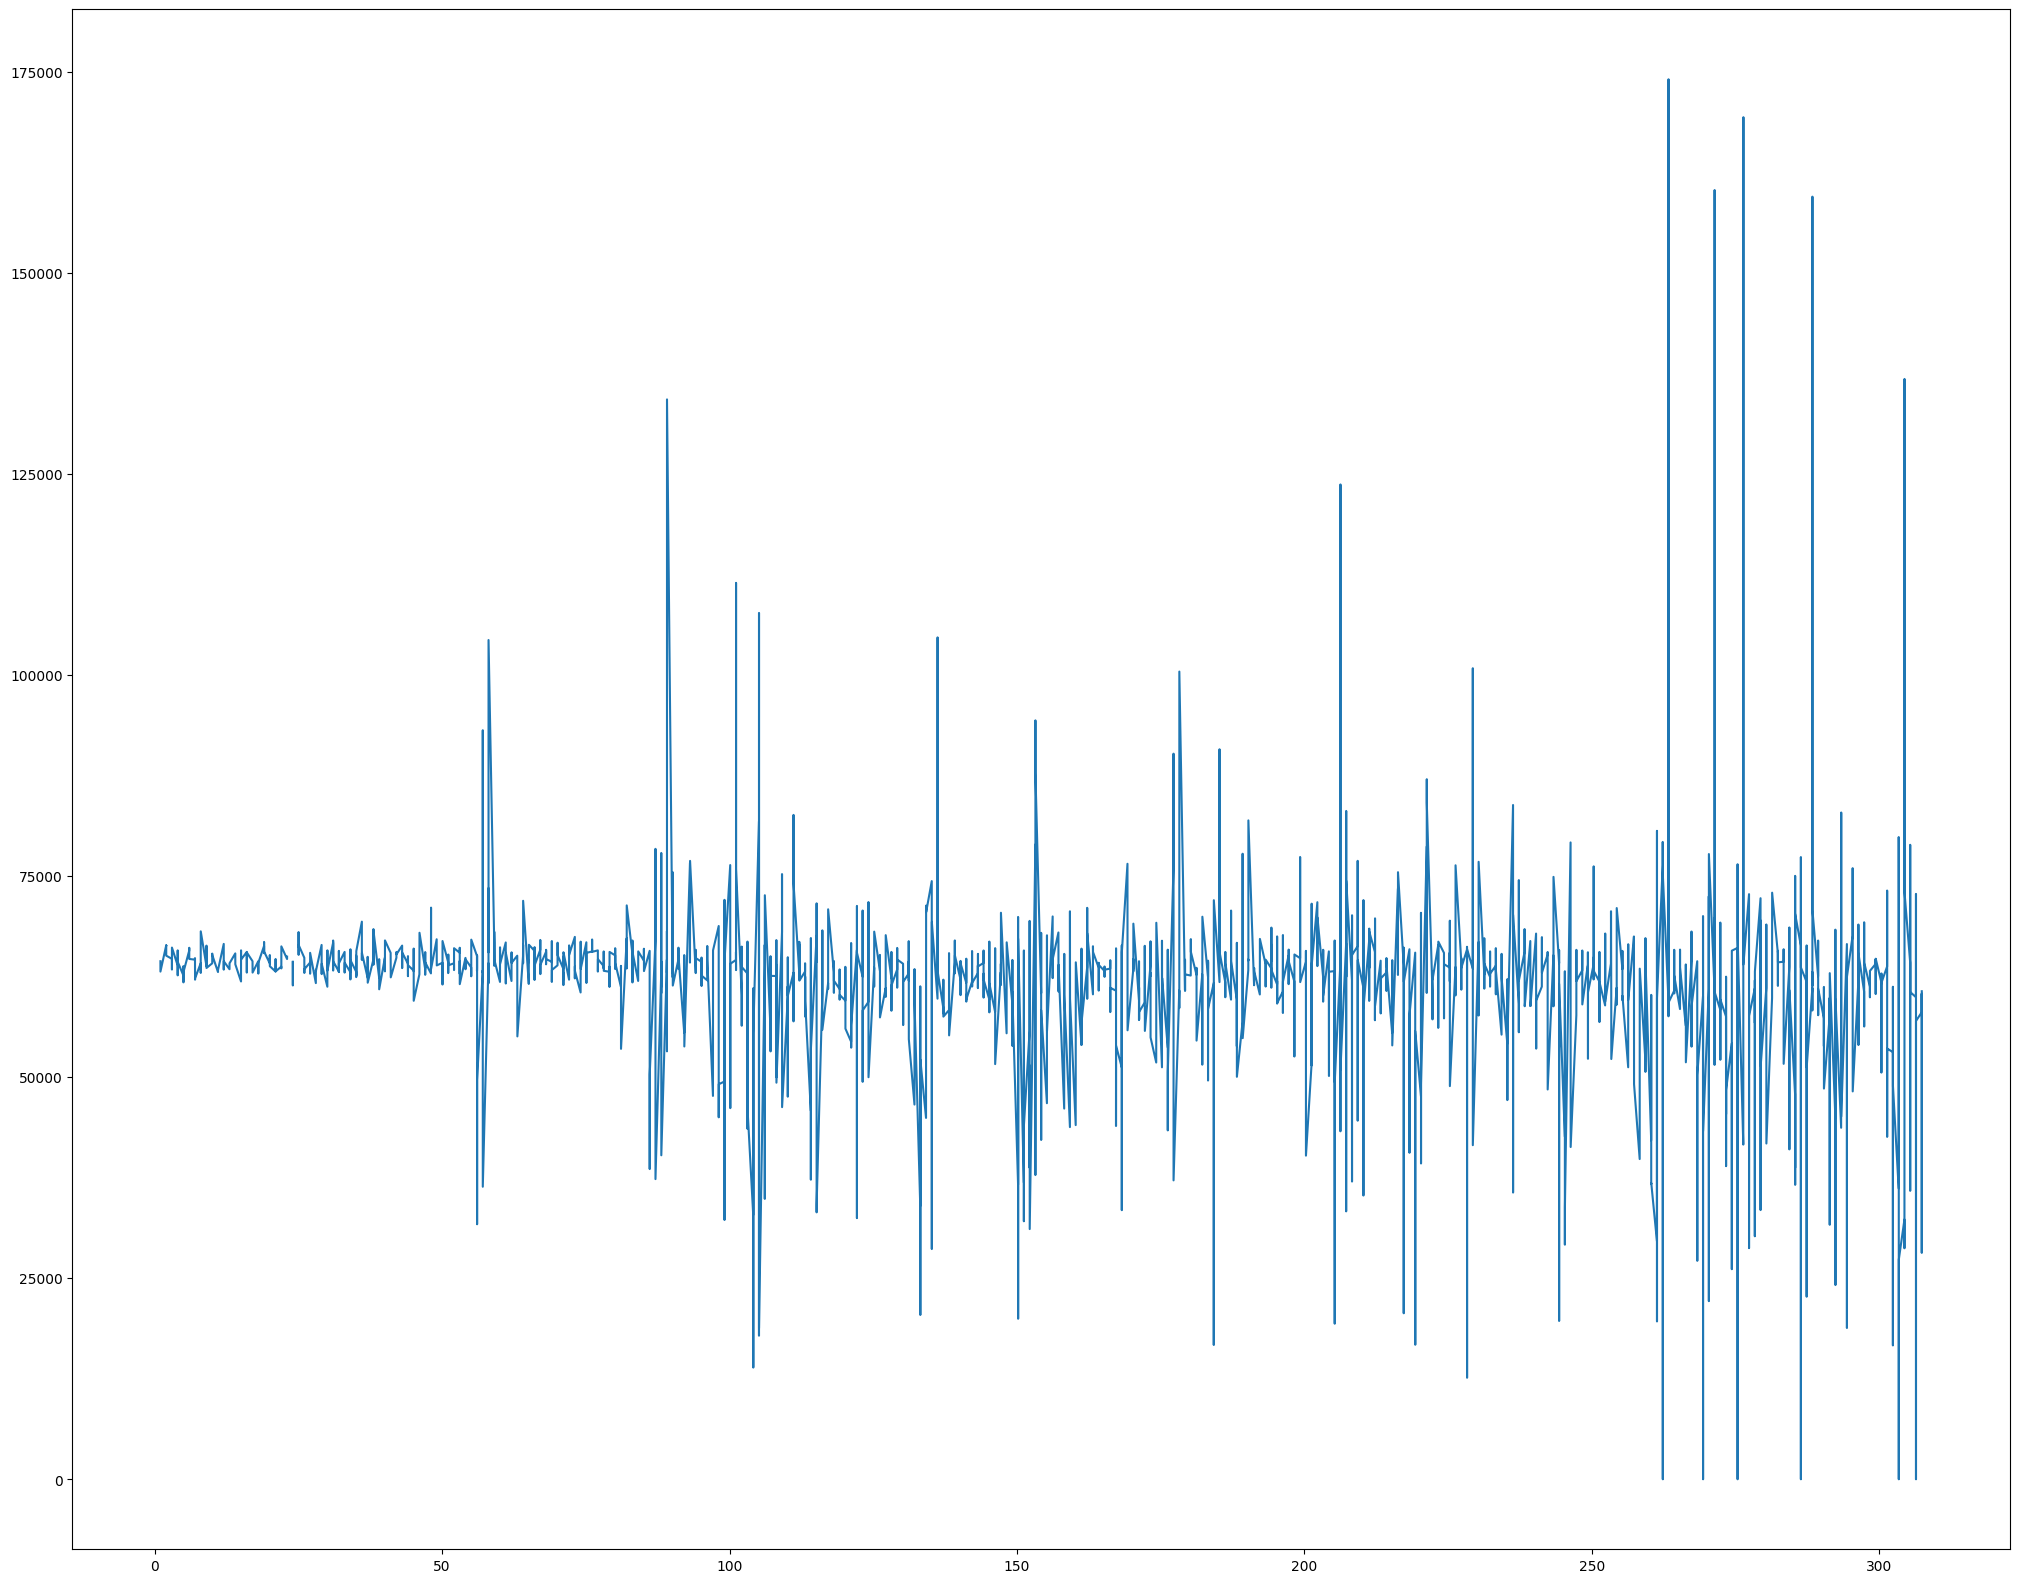

In [79]:
plt.rcParams["figure.figsize"] = [25, 20]
plt_audio_inbound = audio_inbound.loc[:, ["timestamp", "packetRate", "bitrate"]]
# plot average audio bitrate over time
plt_audio_inbound["timestamp"] = plt_audio_inbound["timestamp"] - plt_audio_inbound["timestamp"].min()
plt_audio_inbound["timestamp"] = plt_audio_inbound["timestamp"] / 1000
# audio_inbound["timestamp"] = pd.to_datetime(audio_inbound["timestamp"], unit='ms')
# plt_audio_inbound["bitrate"] = plt_audio_inbound["bitrate"].astype(float)
# audio_inbound["timestamp"] = audio_inbound["timestamp"].dt.total_seconds()
# audio_inbound["timestamp"] = audio_inbound["timestamp"].astype(float)

plt.plot(plt_audio_inbound["timestamp"], plt_audio_inbound["bitrate"])

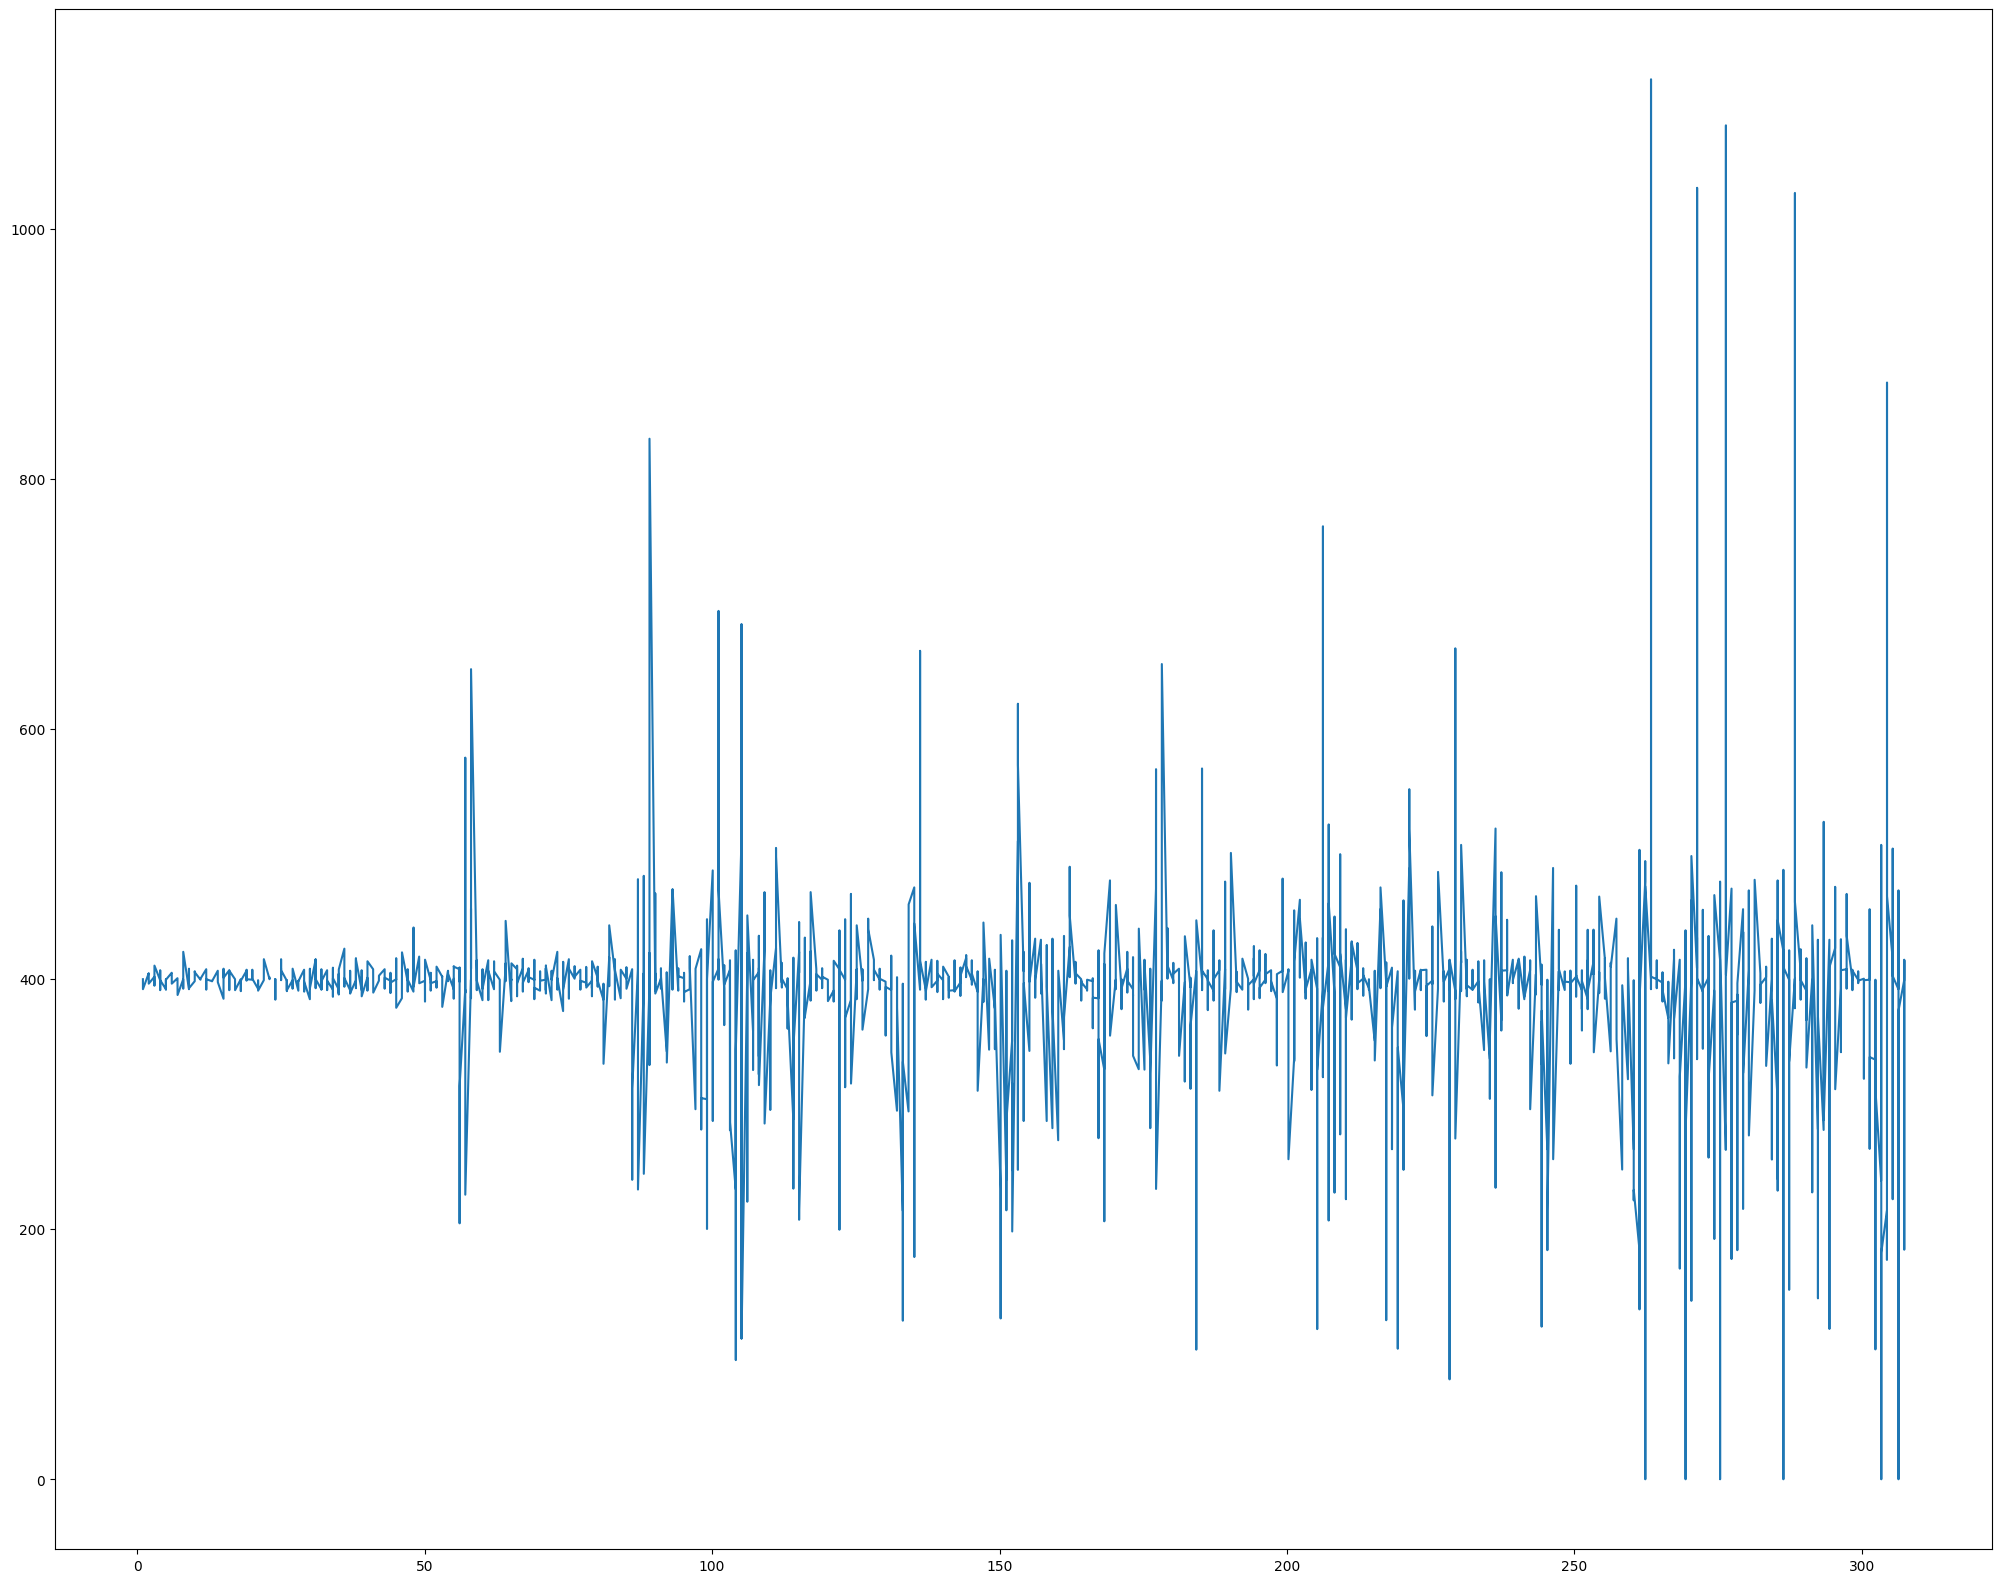

In [78]:

plt.plot(plt_audio_inbound["timestamp"], plt_audio_inbound["packetRate"])